In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

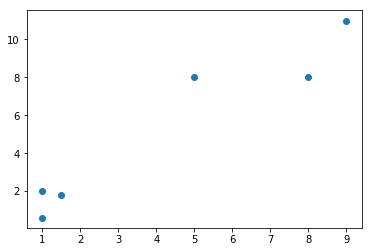

In [3]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [4]:
def min_distance_cluster(point, means, k):
    min_distance = 0
    for i in range(k):
        euc_distance = ((means[i] - point)**2).sum()
        if euc_distance < min_distance :
            min_distance = euc_distance
            cluster = i
    return cluster        

In [5]:
def fit(data, k = 2, max_iter = 100):
    means = [] #list of means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        clusters = []
        for j in range(k):
            clusters.append([])
        #assign the data point to the cluster they belong to 
        for point in data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            clusters[l].append(point)
            
        #update new_means
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis = 0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means         

In [6]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            predictions.append(l)  
    return predictions        

In [7]:
means = fit(x)

In [52]:
predictions = predict(x,means)


predictions

[0, 0, 1, 1, 0, 1]

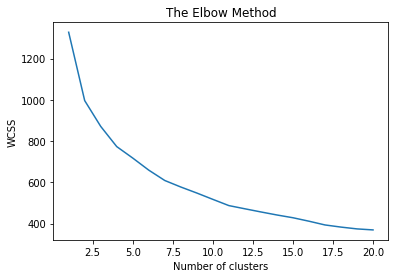

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('crime.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7,12]].values


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# IMPLEMENTING CLUSTERCLASS

In [9]:
class cluster:
    def __init__(self,k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, data):
        self.means = [] #list of means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            clusters = []
            for j in range(self.k):
                clusters.append([])
            #assign the data point to the cluster they belong to 
            for point in data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                clusters[l].append(point)
            #update new_means
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break  
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                predictions.append(l)  
        return predictions 

NameError: name 'k_means' is not defined

In [15]:
import pandas as pd

In [16]:
cr = pd.read_csv('crime.csv')

In [17]:
cr.head()

,nm_pol,murder,rape,gangrape,robbery,theft,assualt murders,sexual harassement,totarea,totalcrime,long,lat,crime/area,area
0,CHITRANJAN PARK,2,6,1,35,442,19,7,2659329.537,512,77.24920,28.53632,192.529731,2.659330
1,DABRI,8,28,0,79,240,26,16,3401013.428,397,77.08600,28.61268,116.729912,3.401013
2,MALVIYA NAGAR,3,28,1,33,694,63,15,1379853.572,837,77.20418,28.52989,606.586102,1.379854
3,CHANDNI MAHAL,1,8,1,23,529,19,7,5570696.132,588,77.23608,28.64361,105.552338,5.570696
4,MODEL TOWN,0,4,1,45,393,9,14,2689157.085,466,77.19369,28.70257,173.288501,2.689157


In [18]:
data = cr.iloc[:,[1,2,3,4,5,6,7,12]].values

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data = sc_X.fit_transform(data)

In [20]:
data[0:5]

array([[-5.27237015e-01, -7.47430695e-01,  5.46264038e-02,
         3.00524552e-02,  1.88399762e-01,  3.22832042e-03,
        -3.42881284e-01,  1.81431485e-01],
       [ 1.60742992e+00,  2.10483357e+00, -7.69735690e-01,
         1.81463077e+00, -7.17973383e-01,  5.39129510e-01,
         9.06544664e-01, -3.48336410e-01],
       [-1.71459192e-01,  2.10483357e+00,  5.46264038e-02,
        -5.10647410e-02,  1.31912269e+00,  3.37175008e+00,
         7.67719559e-01,  3.07528766e+00],
       [-8.83014838e-01, -4.88133944e-01,  5.46264038e-02,
        -4.56650722e-01,  5.78768393e-01,  3.22832042e-03,
        -3.42881284e-01, -4.26456917e-01],
       [-1.23879266e+00, -1.00672745e+00,  5.46264038e-02,
         4.35638436e-01, -3.14630305e-02, -7.62344807e-01,
         6.28894453e-01,  4.69537768e-02]])

In [21]:
clf = cluster(5)

constructor


In [22]:
clf.fit(data)

In [23]:
cr.head()

,nm_pol,murder,rape,gangrape,robbery,theft,assualt murders,sexual harassement,totarea,totalcrime,long,lat,crime/area,area
0,CHITRANJAN PARK,2,6,1,35,442,19,7,2659329.537,512,77.24920,28.53632,192.529731,2.659330
1,DABRI,8,28,0,79,240,26,16,3401013.428,397,77.08600,28.61268,116.729912,3.401013
2,MALVIYA NAGAR,3,28,1,33,694,63,15,1379853.572,837,77.20418,28.52989,606.586102,1.379854
3,CHANDNI MAHAL,1,8,1,23,529,19,7,5570696.132,588,77.23608,28.64361,105.552338,5.570696
4,MODEL TOWN,0,4,1,45,393,9,14,2689157.085,466,77.19369,28.70257,173.288501,2.689157


In [24]:
clf.means

[array([ 0.33183627,  0.55221522,  0.71813736, -0.46951077, -0.35211907,
         0.43269617, -0.00766944, -0.19300105]),
 array([1.36485414, 0.71406008, 0.09209741, 1.20256466, 0.21797314,
        0.43821305, 0.71092747, 0.16923723]),
 array([0.40325883, 1.34688922, 0.56192615, 0.96290021, 1.79198302,
        1.61093189, 1.25894685, 2.12115071]),
 array([-0.68086835, -0.80930833, -0.67605818, -0.81891275, -0.88919306,
        -0.84760181, -0.71202986, -0.53572709]),
 array([-0.41122251, -0.44022041, -0.19626641,  0.35452124,  0.55369974,
        -0.23975793, -0.00789027,  0.0040621 ])]

In [25]:
safety = []
c = 0
for li in clf.means:
    sum = 0;
    sum += li[1] + li[2] + li[6]
    safety.append((sum,c))
    c += 1
safety = sorted(safety)

In [26]:
safety

[(-2.1973963687865186, 3),
 (-0.644377090772446, 4),
 (1.2626831291478038, 0),
 (1.5170849619949647, 1),
 (3.1677622263992418, 2)]

In [27]:
dict1 = {}
m = 0
for s in safety:
    dict1[s[1]] = m 
    m += 1

In [28]:
dict1

{3: 0, 4: 1, 0: 2, 1: 3, 2: 4}

In [41]:
clust_pred = clf.predict(data)

In [48]:
clust_pred[0:5]

[4, 1, 2, 4, 4]

In [49]:
mag_pred = clust_pred.copy()
for i in range(len(clust_pred)):
    mag_pred[i] = dict1[clust_pred[i]]

In [50]:
magnp=np.array(mag_pred)

In [51]:
magnp

array([1, 3, 4, 1, 1, 3, 2, 1, 1, 1, 0, 3, 2, 3, 0, 3, 3, 3, 4, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2,
       3, 0, 4, 3, 1, 0, 2, 3, 1, 1, 2, 2, 3, 4, 3, 2, 1, 0, 0, 2, 0, 2,
       1, 0, 1, 2, 3, 2, 4, 2, 2, 0, 0, 1, 2, 0, 1, 4, 3, 2, 4, 1, 0, 2,
       3, 3, 2, 0, 0, 4, 2, 2, 2, 1, 0, 4, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 1, 2, 2, 3, 0, 2, 2, 0, 1, 4, 4, 1, 0, 2, 4, 2,
       4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 3, 1, 2, 0, 0, 1, 3, 2, 0,
       2, 1, 0, 2, 0, 0, 3, 0, 1, 2, 2, 2])